In [1]:
# Import packages
import pandas as pd
import matplotlib as plt
from matplotlib import figure, pyplot
from statistics import median, mean
import numpy as np
import scipy.stats as st
from numpy import nan
import math
import seaborn as sns
from kneed import KneeLocator

In [19]:
# Load in features
features = pd.read_csv(r"/Users/ilanadeutsch/Desktop/features.csv").iloc[:,1:]
erodedFeatures = pd.read_csv(r"/Users/ilanadeutsch/Desktop/featuresEroded.csv").iloc[:,1:]

# Intialize variables
results = []

# Loop through all features
for count, feature in enumerate(features):
    
    # Calculate the MFR for each feature
    ratio = features[str(feature)]/erodedFeatures[str(feature)]
    ratio = [x for x in ratio if not(math.isnan(x))]

    # Skip features where all ratios are undefined
    if len(ratio) == 0:
        results.append([feature, np.nan, np.nan])
        continue 

    # Calculate mean ratio
    MFR = mean(ratio)

    # Calculate SDFR
    SDFR = math.sqrt(sum(([(x - MFR)**2 for x in ratio]))/len(ratio))

    # Append results to list
    results.append([feature, MFR, SDFR])

# Save results as df
df = pd.DataFrame(results)

In [20]:
# NOTE: Make sure to reset cells before this before rerunning

# Set value cutoffs (For MRF: 1 = upper, 2 = lower. Both equal distance from 1)
MRF_cutoff = 100
SDRF_cutoff = 100

# Intialize list of dropped features
dropped_MRF_features = []
dropped_SDRF_features =[]

# Add features below cutoff values to a list
for featNum, feature in enumerate(df[0]):
    if abs(df.iloc[featNum,1]) > MRF_cutoff:
        dropped_MRF_features.append(feature) 
    elif df.iloc[featNum,2] > SDRF_cutoff:
        dropped_SDRF_features.append(feature)

# Remove features below specified cutoff values
df_new = df[abs(df[1]) < MRF_cutoff]
df_new = df_new[abs(df[2]) < SDRF_cutoff]

# Find overlap between MRF and SDFR
overlap = [feature for feature in dropped_MRF_features if feature in dropped_SDRF_features]

# Display dropped features
print(f"Dropped MRF features: {dropped_MRF_features}")
print(f"Total = {len(dropped_MRF_features)}")
print("\n")
print(f"Dropped SDRF features: {dropped_SDRF_features}")
print(f"Total = {len(dropped_SDRF_features)}")
print("\n")
print(f"Overlap: {overlap}")
print(f"Total = {len(overlap)}")

Dropped MRF features: ['original_firstorder_10Percentile', 'original_firstorder_Minimum', 'original_FDTA_HurstCoeff_3', 'original_FDTA_HurstCoeff_4', 'LoG_sigma=1.0_FDTA_HurstCoeff_3', 'LoG_sigma=1.0_FDTA_HurstCoeff_4', 'LoG_sigma=2.0_FDTA_HurstCoeff_3', 'LoG_sigma=2.0_FDTA_HurstCoeff_4', 'bior1.1-LH_FDTA_HurstCoeff_3', 'bior1.1-LH_FDTA_HurstCoeff_4', 'bior1.1-HL_FDTA_HurstCoeff_3', 'bior1.1-HL_FDTA_HurstCoeff_4', 'bior1.1-HH_FDTA_HurstCoeff_3', 'bior1.1-HH_FDTA_HurstCoeff_4', 'bior1.1-LL_FDTA_HurstCoeff_3', 'bior1.1-LL_FDTA_HurstCoeff_4', 'LBP_radius=1.0_glszm_SmallAreaEmphasis', 'LBP_radius=1.0_glszm_SmallAreaHighGrayLevelEmphasis', 'LBP_radius=1.0_glszm_SmallAreaLowGrayLevelEmphasis', 'LBP_radius=1.0_FDTA_HurstCoeff_3', 'LBP_radius=1.0_FDTA_HurstCoeff_4']
Total = 21


Dropped SDRF features: ['bior1.1-HH_glcm_Imc1']
Total = 1


Overlap: []
Total = 0


/var/folders/lz/9tmgdk_s2lg__fml_452bxg80000gn/T/ipykernel_47698/1643962554.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_new = df_new[abs(df[2]) < SDRF_cutoff]


Knee location: feature 766
MFR value: 1.5563922878903154
2nd MFR value: 0.5563922878903154


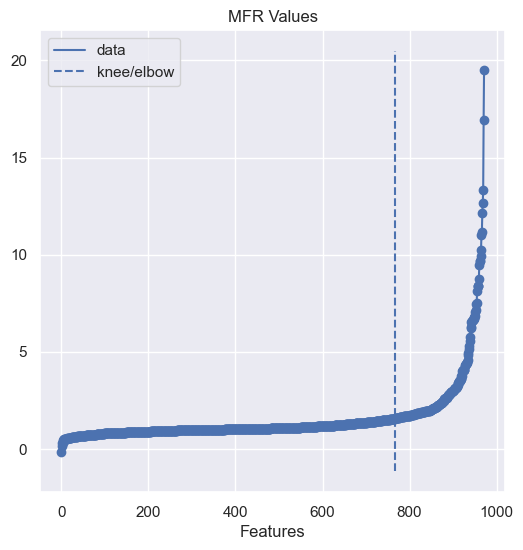

In [23]:
# Sort data frame by MFR values and export
sorteddf=df_new.sort_values(by = 1)
#sorteddf.to_excel(r"/Users/ilanadeutsch/Desktop/sorted_MFR_vals.xlsx", header = ["Feature","MFR","SDFR"])

# Change feature names to numbers for plotting
for entryNum, entry in enumerate(sorteddf[2]):
    sorteddf.iloc[entryNum,0] = entryNum

# Locate knee / elbow point
kneedle = KneeLocator(sorteddf.iloc[:,0].tolist(),sorteddf.iloc[:,1].tolist(), S= 200, curve="convex", direction="increasing")
kneedle.plot_knee()

# Print knee location
print(f"Knee location: feature {kneedle.knee}")
print(f"MFR value: {sorteddf.iloc[kneedle.knee,1]}")
print(f"2nd MFR value: {sorteddf.iloc[kneedle.knee,1]-1}")

# Plot nRoA values of each feature from smallest to largest
sns.set_theme()
plt.pyplot.scatter(x= sorteddf.iloc[:,0],y = sorteddf.iloc[:,1])
plt.pyplot.title("MFR Values")
plt.pyplot.xlabel("Features")
plt.pyplot.ylabel("")
plt.pyplot.show()

Knee location: feature 857
SDFR value: 2.4995007689310813


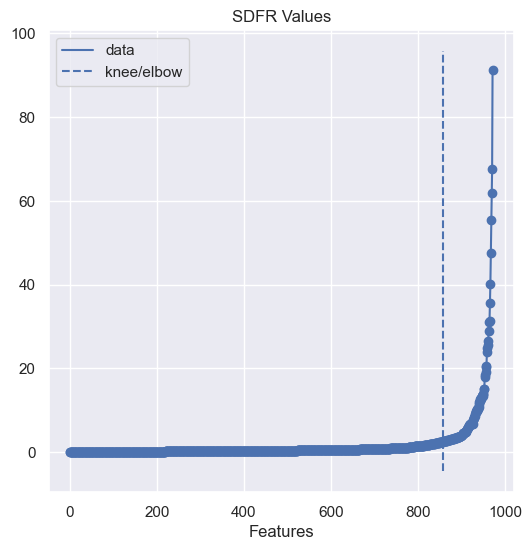

In [25]:
# Sort data frame by SDFR values and export
sorteddf=df_new.sort_values(by = 2)
#sorteddf.to_excel(r"/Users/ilanadeutsch/Desktop/sorted_SDFR_vals.xlsx", header = ["Feature","MFR","SDFR"])

# Change feature names to numbers for plotting
for entryNum, entry in enumerate(sorteddf[2]):
    sorteddf.iloc[entryNum,0] = entryNum

# Locate knee / elbow point
kneedle = KneeLocator(sorteddf.iloc[:,0].tolist(),sorteddf.iloc[:,2].tolist(), S= 200, curve="convex", direction="increasing")
kneedle.plot_knee()

# Print knee location
print(f"Knee location: feature {kneedle.knee}")
print(f"SDFR value: {sorteddf.iloc[kneedle.knee,2]}")

# Plot nRoA values of each feature from smallest to largest
sns.set_theme()
plt.pyplot.scatter(x= sorteddf.iloc[:,0],y = sorteddf.iloc[:,2])
plt.pyplot.title("SDFR Values")
plt.pyplot.xlabel("Features")
plt.pyplot.ylabel("")
plt.pyplot.show()